# Data Visualization with Python

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, it helps to make complex data more understandable and accessible. In this notebook, we'll explore various visualization techniques to analyze the SpaceX Falcon 9 launch data.

We'll use libraries like `matplotlib` and `seaborn` to create visualizations that highlight key insights and trends in the dataset.

---

# Step 1: Importing Libraries

We'll start by importing the necessary libraries. `pandas` is used for data manipulation, `numpy` for numerical operations, `matplotlib.pyplot` for creating static, animated, and interactive visualizations, and `seaborn` for making statistical graphics.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

# Step 2: Loading the Dataset

We'll load the cleaned dataset from the previous steps. This dataset contains information about SpaceX Falcon 9 launches, including payload mass, launch site, orbit, and launch outcomes.


In [4]:
df=pd.read_csv("C:\\personal\\spacex-ibm\\dataset_part_2.csv")

In [5]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class,Class
0,1,2006-03-24,Falcon 1,20.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin1A,167.743129,9.047721,0,0
1,2,2007-03-21,Falcon 1,5919.165341,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2A,167.743129,9.047721,0,0
2,4,2008-09-28,Falcon 1,165.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2C,167.743129,9.047721,0,0
3,5,2009-07-13,Falcon 1,200.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin3C,167.743129,9.047721,0,0
4,6,2010-06-04,Falcon 9,5919.165341,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,0


---

# Step 3: Visualizing Payload Mass by Flight Number

Let's create a scatter plot to visualize the relationship between payload mass and flight number, with color coding based on the success of the landing (`Class`).


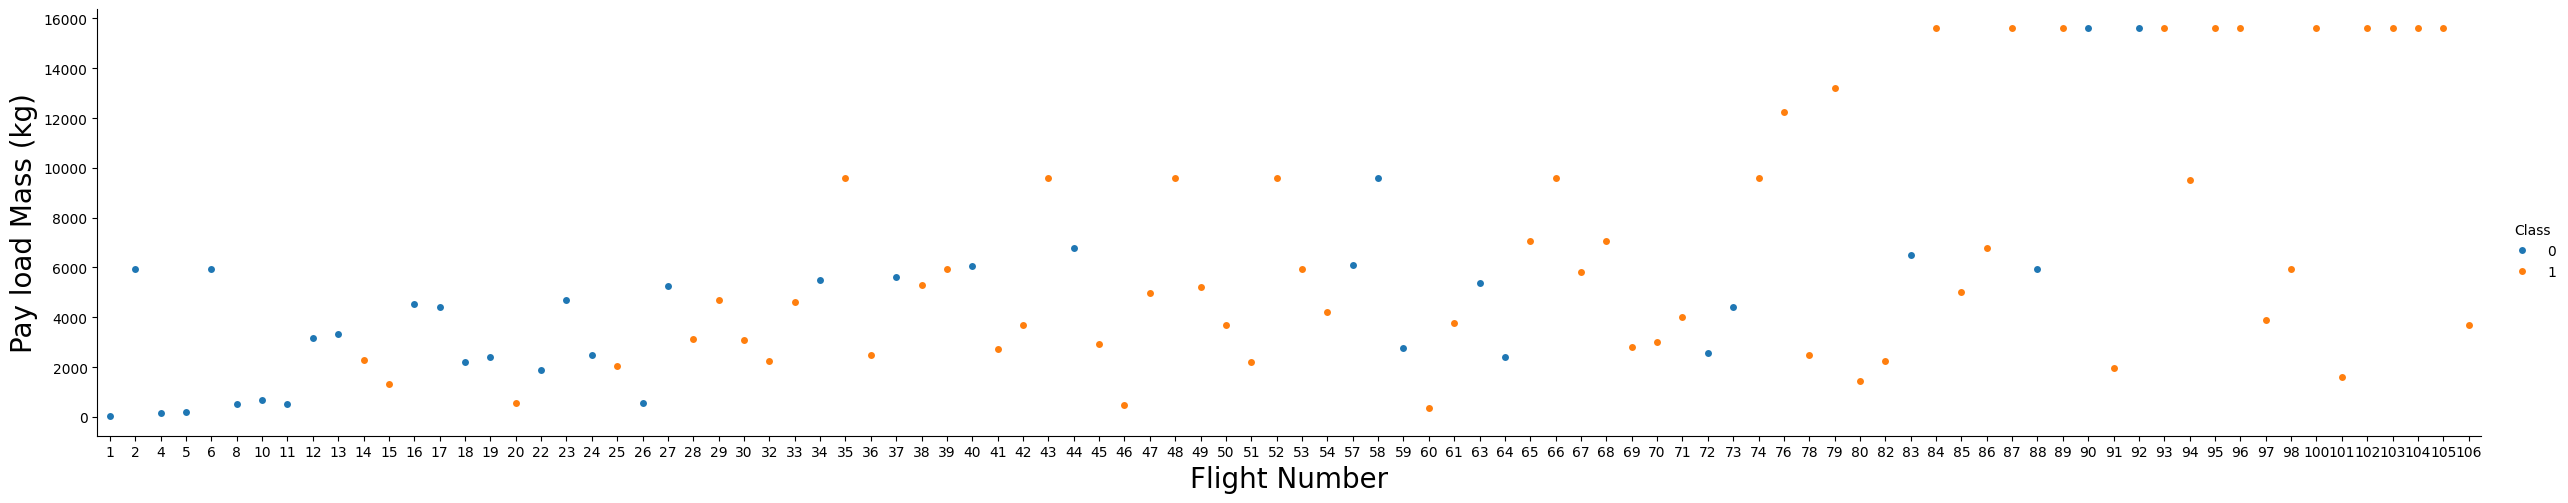

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

---

# Step 4: Visualizing Launch Site by Flight Number

We'll create a scatter plot to explore the relationship between flight number and launch site, with different colors representing the success or failure of the launch.


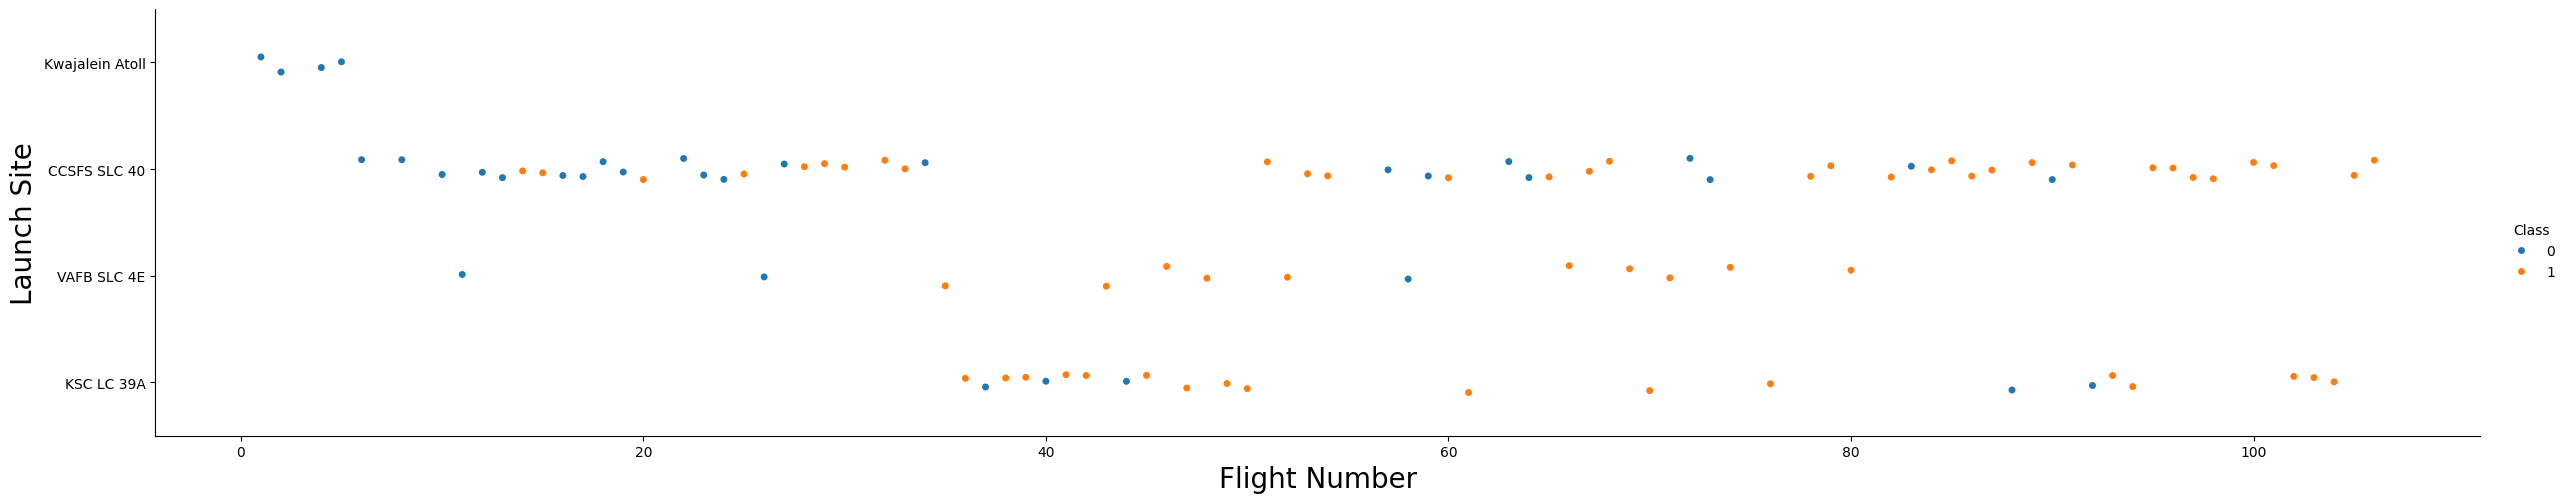

In [7]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5, height=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()


---

# Step 5: Visualizing Payload Mass by Launch Site

This scatter plot will show the relationship between payload mass and launch site, with colors indicating the success of the landing.


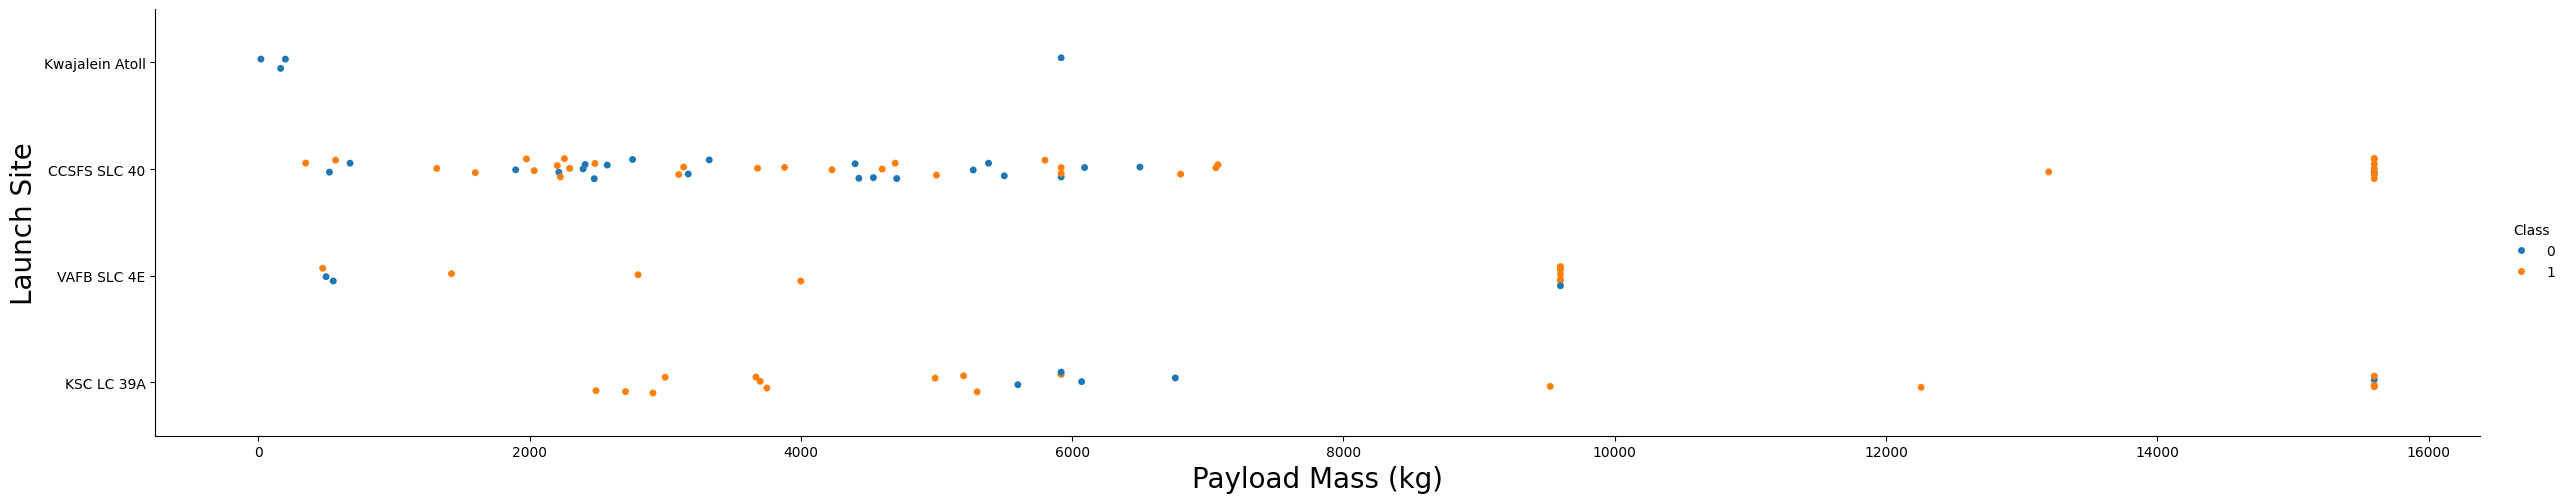

In [8]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=5, height=5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()


---

# Step 6: Success Rate by Orbit

We'll create a bar chart to visualize the success rate of launches for each orbit type. This will help us understand which orbits have higher success rates.


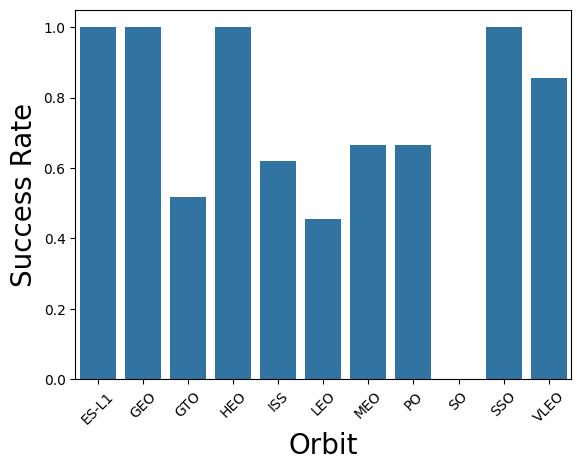

In [9]:
# Create a bar chart for the success rate of each orbit
orbit_success_rate = df.groupby("Orbit")["Class"].mean().reset_index()
sns.barplot(x="Orbit", y="Class", data=orbit_success_rate)
plt.xlabel("Orbit", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.xticks(rotation=45)
plt.show()


---

# Step 7: Visualizing Flight Number by Orbit

This scatter plot will explore the relationship between flight number and orbit type, with colors representing the success of the landing.


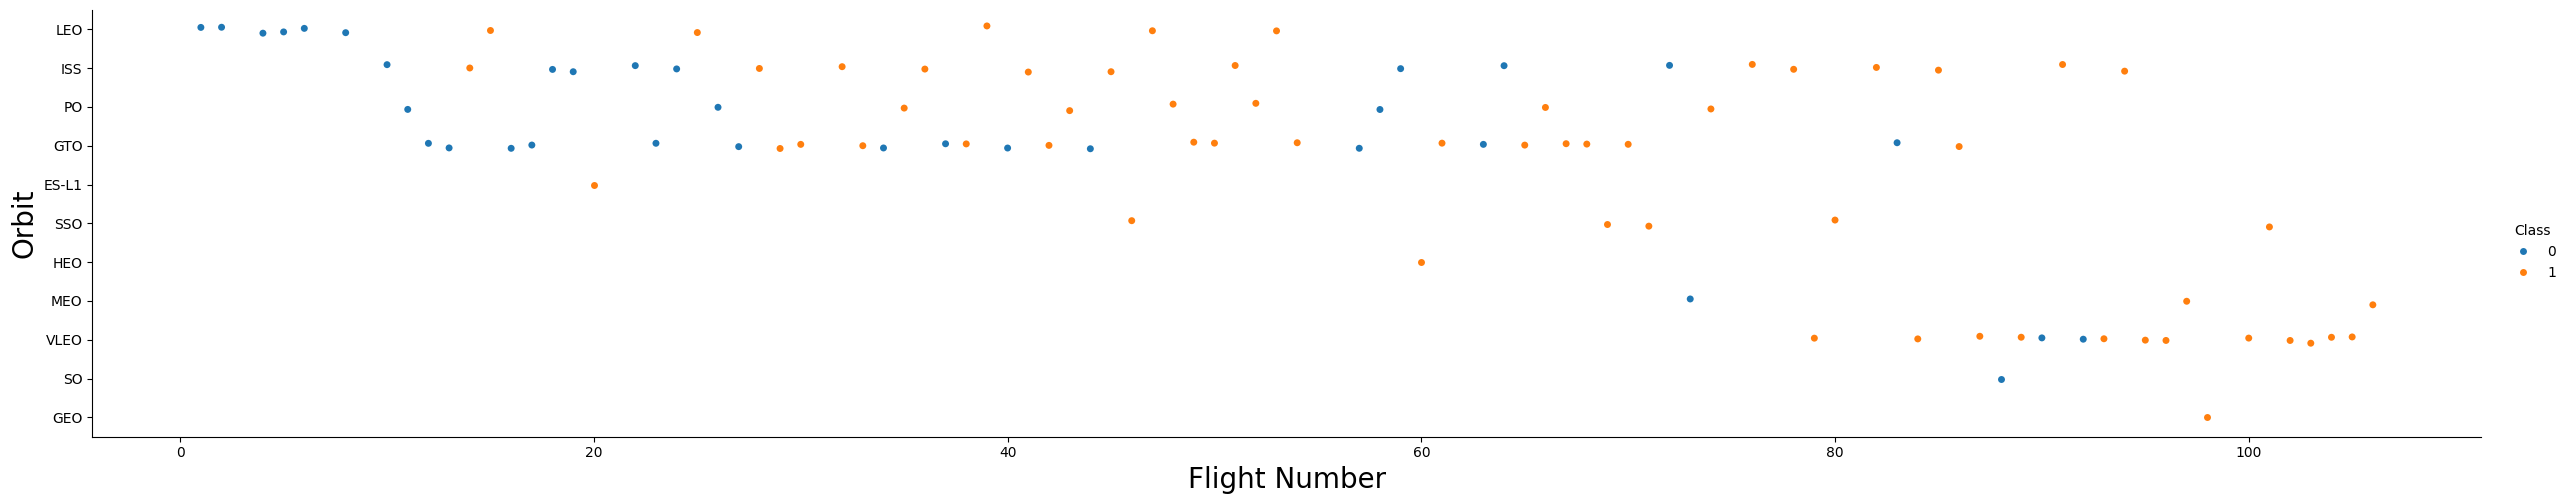

In [10]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=5, height=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()


---

# Step 8: Payload Mass by Orbit

We'll create a scatter plot to visualize the relationship between payload mass and orbit type, with color coding based on landing success.


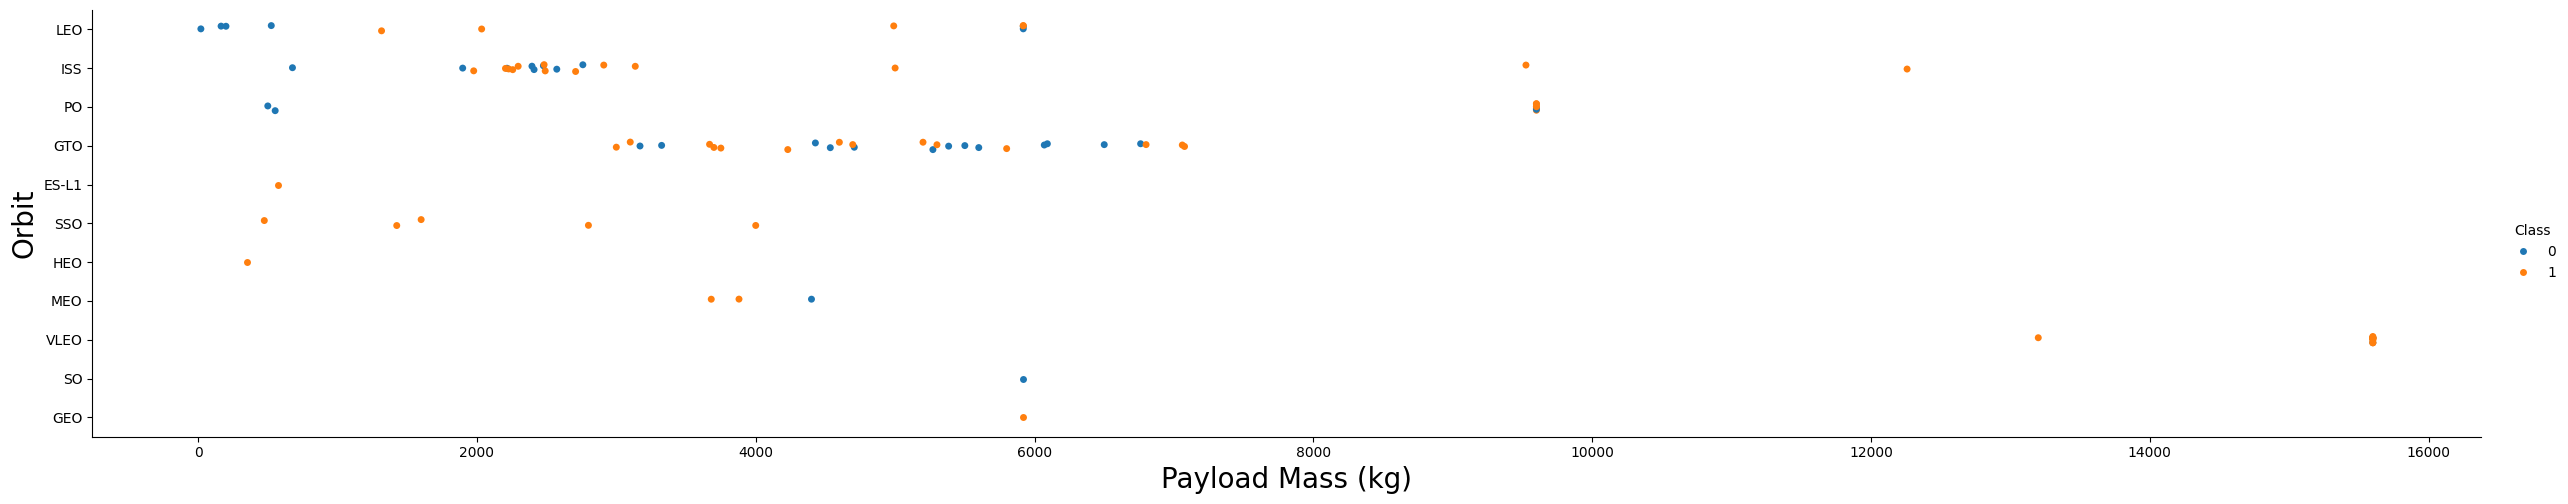

In [11]:
# Plot a scatter point chart with x axis to be Payload Mass (kg) and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect=5, height=5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()


---

# Step 9: Yearly Success Rate of SpaceX Launches

We'll extract the year from the launch date and plot the success rate over time. This will help us see trends in the success rate of SpaceX launches by year.


In [12]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [13]:
# Extract the year and add it as a new column to the DataFrame
df['Year'] = Extract_year(df)


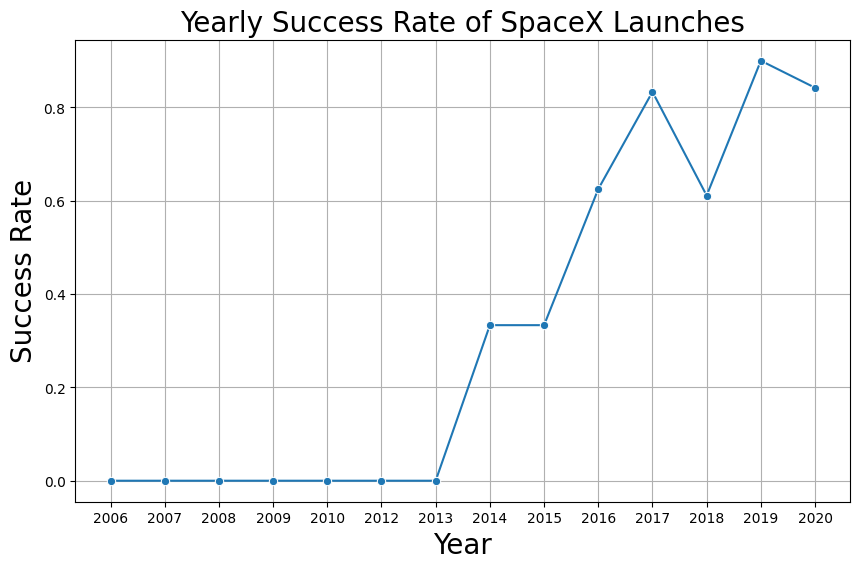

In [14]:
# Group by Year and calculate the mean success rate for each year
yearly_success_rate = df.groupby("Year")["Class"].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Class", data=yearly_success_rate, marker='o')

plt.xlabel("Year", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.title("Yearly Success Rate of SpaceX Launches", fontsize=20)
plt.grid(True)
plt.show()


---

# Step 10: Preparing Features for Modeling

We'll create a new DataFrame with the relevant features for further analysis or machine learning. This involves one-hot encoding categorical variables and ensuring all data types are consistent.


In [16]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,20.000000,LEO,Kwajalein Atoll,1,False,False,False,NaN,NaN,0,Merlin1A
1,2,5919.165341,LEO,Kwajalein Atoll,1,False,False,False,NaN,NaN,0,Merlin2A
2,4,165.000000,LEO,Kwajalein Atoll,1,False,False,False,NaN,NaN,0,Merlin2C
3,5,200.000000,LEO,Kwajalein Atoll,1,False,False,False,NaN,NaN,0,Merlin3C
4,6,5919.165341,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003


In [17]:
# Assuming the 'features' dataframe contains the relevant columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the dataframe to see the result
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,Serial_Merlin1A,Serial_Merlin2A,Serial_Merlin2C,Serial_Merlin3C
0,1,20.000000,1,False,False,False,NaN,0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2,5919.165341,1,False,False,False,NaN,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,4,165.000000,1,False,False,False,NaN,0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,5,200.000000,1,False,False,False,NaN,0,False,False,...,False,False,False,False,False,False,False,False,False,True
4,6,5919.165341,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Cast the entire dataframe to float64
features_one_hot = features_one_hot.astype('float64')

# Display the first few rows again to verify the data types
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,Serial_Merlin1A,Serial_Merlin2A,Serial_Merlin2C,Serial_Merlin3C
0,1.0,20.000000,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,5919.165341,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,165.000000,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5.0,200.000000,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6.0,5919.165341,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
